In [58]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pandas as pd

['skcm_dfci_2015_clinical_data.tsv']

In [10]:
mel_df = pd.read_csv('/Users/jlindsay/Code/python_intro/data/skcm_dfci_2015_clinical_data.tsv', sep='\t', header=0)

In [11]:
mel_df.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Cancer Type,Cancer Type Detailed,CBSET B cells memory,CBSET B cells naive,CBSET Dendritic cells activated,CBSET Dendritic cells resting,...,Number of Samples Per Patient,Serum Lactate Dehydrogenase,Sex,Somatic Status,ESTIMATE Stromal Score,TMB (nonsynonymous),Treatment,Tumor Sample Histology,Tumor Site,Tumor Stage
0,skcm_dfci_2015,Pat02,Pat02,42,Melanoma,Cutaneous Melanoma,0.000000,0.023226,0.000000,0.000000,...,1,1.0,Female,Matched,2115.609593,7.566667,ipilimumab,Unknown or NA,4,NaN
1,skcm_dfci_2015,Pat03,Pat03,61,Melanoma,Cutaneous Melanoma,0.003156,0.000000,0.000000,0.011005,...,1,1.0,Female,Matched,722.244537,12.300000,ipilimumab,Acrolentigenous,4,NaN
2,skcm_dfci_2015,Pat04,Pat04,71,Melanoma,Cutaneous Melanoma,0.000000,0.005937,0.000000,0.000339,...,1,0.0,Male,Matched,-251.911190,10.933333,ipilimumab,Nodular,4,NaN
3,skcm_dfci_2015,Pat06,Pat06,33,Melanoma,Cutaneous Melanoma,0.000000,0.296795,0.002502,0.006298,...,1,0.0,Male,Matched,1059.079106,5.700000,ipilimumab,Superficial spreading,4,NaN
4,skcm_dfci_2015,Pat07,Pat07,36,Melanoma,Cutaneous Melanoma,NaN,NaN,NaN,NaN,...,1,0.0,Male,Matched,NaN,4.933333,ipilimumab,Unknown or NA,3,NaN


In [12]:
mel_df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Cancer Type', 'Cancer Type Detailed', 'CBSET B cells memory',
       'CBSET B cells naive', 'CBSET Dendritic cells activated',
       'CBSET Dendritic cells resting', 'CBSET Eosinophils',
       'CBSET Macrophages M0', 'CBSET Macrophages M1', 'CBSET Macrophages M2',
       'CBSET Mast cells activated', 'CBSET Mast cells resting',
       'CBSET Monocytes', 'CBSET Neutrophils', 'CBSET NK cells activated',
       'CBSET NK cells resting', 'CBSET Plasma cells',
       'CBSET T cells CD4 memory activated',
       'CBSET T cells CD4 memory resting', 'CBSET T cells CD4 naive',
       'CBSET T cells CD8', 'CBSET T cells follicular helper',
       'CBSET T cells gamma delta', 'CBSET T cells regulatory (Tregs)',
       'CIBERSORT Absolute', 'CIBERSORT Correlation', 'CIBERSORT P-value',
       'CIBERSORT RMSE', 'Cohort', 'Cytolytic Score',
       'Disease Free Survival (Months)', 'Disease Free status', 'Dosage',
       'Dur

<AxesSubplot:>

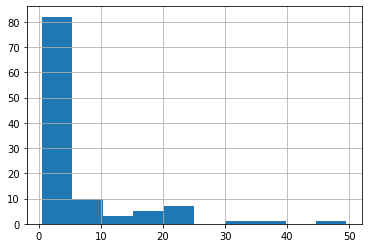

In [48]:
mel_df['Disease Free Survival (Months)'].hist()

In [14]:
mel_df['Durable Clinical Benefit'].value_counts()

PD    76
PR    14
SD    12
X      5
CR     3
Name: Durable Clinical Benefit, dtype: int64

To stratify our cohort, “clinical benefit” was defined using a composite end point of complete response or partial response to ipilimumab by RECIST criteria (21) or stable disease by RECIST criteria with overall survival greater than 1 year (n = 27).

In [49]:
def test_cb(row):
    
    # CB
    if row['Durable Clinical Benefit'] in ['CR', 'PR']:
        return 'CB'
    
    # CB part 2: SD os>=1year
    if row['Durable Clinical Benefit'] == 'SD' and row['Overall Survival (Months)'] >= 12:
        return 'CB'
    
    if row['Durable Clinical Benefit'] == 'SD' and row['Overall Survival (Months)'] > 1:
        return 'NCB'
    
    if row['Disease Free Survival (Months)'] < 6 and row['Overall Survival (Months)'] > 24:
        return 'LTS-NCB'
    
    # no benefit
    return 'NCB'
    #if x == 'SD' and 

mel_df['clinical_benefit'] = mel_df.apply(test_cb, axis=1)

In [50]:
mel_df.clinical_benefit.value_counts()

NCB        74
CB         26
LTS-NCB    10
Name: clinical_benefit, dtype: int64

In [67]:
mel_df[['Disease Free Survival (Months)', 'Mutation Load', 'Neo-antigen Load', 'Overall Survival (Months)']].head()

,Disease Free Survival (Months),Mutation Load,Neo-antigen Load,Overall Survival (Months)
0,17.933333,233,113,54.400000
1,2.533333,372,131,3.333333
2,21.533333,336,271,32.900000
3,2.566667,174,167,5.366667
4,24.033333,148,99,35.000000


In [56]:
mel_lf = mel_df[['clinical_benefit', 'Mutation Load', 'Neo-antigen Load']].melt(id_vars='clinical_benefit')
mel_lf.head()

,clinical_benefit,variable,value
0,CB,Mutation Load,233
1,NCB,Mutation Load,372
2,CB,Mutation Load,336
3,NCB,Mutation Load,174
4,CB,Mutation Load,148


Text(0.5, 1.0, 'Mutation load and Neo-antigen load')

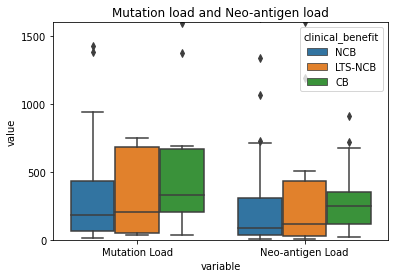

In [68]:

ax = sns.boxplot(data=mel_lf, x='variable', y='value', hue='clinical_benefit', hue_order=['NCB', 'LTS-NCB', 'CB'])
ax.set_ylim(0, 1600)
ax.set_yticks([0, 500, 1000, 1500])
ax.set_title("Mutation load and Neo-antigen load")

In [65]:
mel_lf.groupby(['clinical_benefit', 'variable']).mean()

value
clinical_benefit variable                    
CB               Mutation Load     737.153846
                 Neo-antigen Load  467.692308
LTS-NCB          Mutation Load     571.500000
                 Neo-antigen Load  383.000000
NCB              Mutation Load     396.810811
                 Neo-antigen Load  315.986486